# Problem 4

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

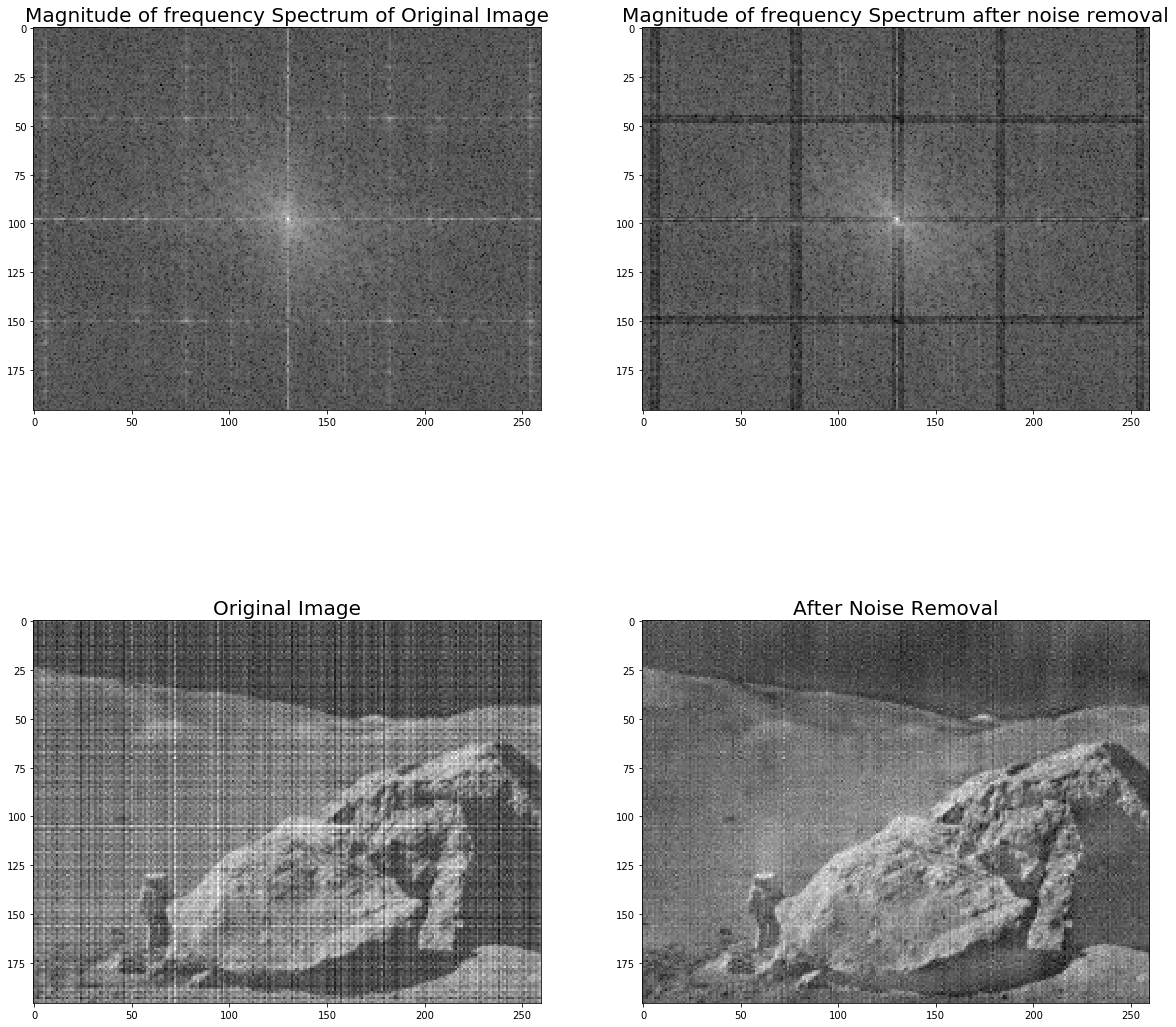

In [3]:
img = cv2.imread('../input_data/land.png', cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1 + np.abs(fshift))


new_transform = np.copy(fshift)
new_transform[148:152, 0:256] /= 5
new_transform[45:49, 0:256] /= 5
new_transform[0:97, 128:134] /= 5
new_transform[102:200, 128:134] /= 5

new_transform[0:97, 76:82] /= 5
new_transform[102:200, 76:82] /= 5

new_transform[0:97, 4:9] /= 5
new_transform[102:200, 4:9] /= 5
new_transform[0:97, 253:257] /= 5
new_transform[102:200, 253:257] /= 5


new_transform[0:97, 181:186] /= 5
new_transform[102:200, 181:186] /= 5

new_transform[97:100, 0:128] /= 5
new_transform[97:100, 132:256] /= 5

f_ishift = np.fft.ifftshift(new_transform)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

images = []
subtitles = []
images.append(magnitude_spectrum)
images.append(np.log(1 + np.abs(new_transform)))
images.append(img)
images.append(img_back)

subtitles.append('Magnitude of frequency Spectrum of Original Image')
subtitles.append('Magnitude of frequency Spectrum after noise removal')
subtitles.append('Original Image')
subtitles.append('After Noise Removal')
display_images(images, 2, 2, (20, 20), '', subtitles)

- The noisy image contained horizontal and vertical lines and this clearly indicated the presence of certain frequency spikes in the frequency spectrum.
- Therefore, we went to the Fourier Domain for the noise removal.
- The frequency spectrum showed bright spikes corresponding to the noisy lines.
- We manually decreased the magnitude of these frequency spikes, and hence removed the noise
- Care was taken not to touch the central spike as it is the DC component of the image and contributes to the overall brightness of the image